### Task 7: Cartoonify Faces

Name: Chun Cheong MAK <br>
Student ID: 101409987

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
cascPathface = os.path.dirname(
    cv2.__file__) + "/data/haarcascade_frontalface_alt2.xml"

In [3]:
face_cascade = cv2.CascadeClassifier(cascPathface)

In [4]:
zaku = cv2.imread('Zaku.png')

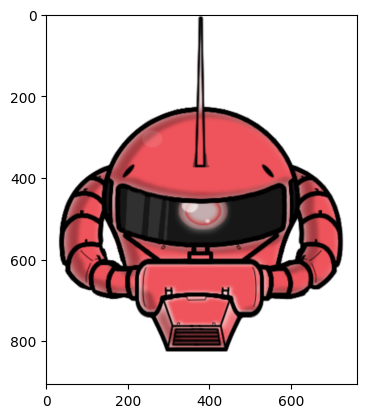

In [5]:
zaku_RGB = cv2.cvtColor(zaku, cv2.COLOR_BGR2RGB)
plt.imshow(zaku_RGB)

##### 7.1 Function for Making a Cartoon Face

In [6]:
def Cartoon_face(img, img2):

    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in face_rects:
        img2 = cv2.resize(img2, (h, w))
        img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
        mask_inv = cv2.bitwise_not(img2gray)
        fg = cv2.bitwise_or(img2, img2, mask=mask_inv)
        roi = face_img[y:y+h,x:x+w]
        final_roi = cv2.bitwise_or(roi, fg)
        face_img[y:y+h,x:x+w] = final_roi

    return face_img

##### 7.2 Function for Playing and Saving the Video

In [7]:
def save_webcam(outPath, fps, form='mp4v'):
    import time
    cap = cv2.VideoCapture(0)

    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) 
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    fourcc = cv2.VideoWriter_fourcc(*f"{form}")
    out = cv2.VideoWriter(outPath, fourcc, fps, (width, height))

    while cap.isOpened():

        ret, frame = cap.read()

        if ret == True:

            frame = Cartoon_face(frame, zaku)
            cv2.imshow('Video with Cartoon Face', frame)
            out.write(frame)
        
        else:
            break

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()

##### 7.3 Record and Get the .mp4 Video

In [8]:
def main():
    save_webcam('Chun_Cheong_Mak_Task7_Cartoonify_Faces.mp4', 30)

In [9]:
if __name__ == '__main__':
    main()

##### 7.4 Record and Get the .avi Video

In [10]:
def main():
    save_webcam('Chun_Cheong_Mak_Task7_Cartoonify_Faces.avi', 30, form='XVID')

In [11]:
if __name__ == '__main__':
    main()

##### 7.5 Watch the Video

In [12]:
filepath_mp4 = 'Chun_Cheong_Mak_Task7_Cartoonify_Faces.mp4'
filepath_avi = 'Chun_Cheong_Mak_Task7_Cartoonify_Faces.avi'

In [13]:
def play_video(filepath):
    import time
    cap = cv2.VideoCapture(filepath)

    if cap.isOpened() == False:
        print('ERROR FILE NOT FOUND OR WRONG CODEC USED!')

    while cap.isOpened():

        ret, frame = cap.read()
    
        if ret == True:
            time.sleep(1/30)
            cv2.imshow('frame', frame)
    
        else:
            break

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
    cap.release()
    cv2.destroyAllWindows()

In [14]:
play_video(filepath_mp4)

In [15]:
play_video(filepath_avi)